# Computational Economics  (ECO288)

## Tutorial: Epidemiology Models


H.W. Heathcote: epidemiologic models are *deterministic models for infectious diseases which are spread by direct person-to-person contact in a population*.

This kind of models has been used since by a few decades by economist, for matters that have nothing to do with health.

- diffusion of information, or opinions on social medias
- asset prices and fads
- expectation formation for macroeconomic outcomes (ex: *The Epidemiology of Macroeconomic Expectations* by Chris Carroll)

Epidemiologic models have two features that depart from standard economic models:

- Agent's behaviour does not take the full system into account, an is irrational in the sense that it isn't forwards looking. Instead, an agent is given a behavioural heuristic.
- The transitions of the whole system can be determined without solving for complex interactions first.

Understanding why these two assumptions are very costly for economists will keep us busy during a big part of the course. Here we just consider two simple models as small programming exercises.

### Simple SIR model

There is a continuum of agents of mass $1$. Each agent can be either "Susceptible" (S), "Infected" (I) or "Recovered" (R).
Agents meet randomly. Each agent neets another agent drawn randomly at each period.

During a meeting Susceptible agents would meet an Infected agent will always catch the disease (or the fad), but are not contagious. Infected agents, have a probability $\pi$ of being recovered. No distinction is made between recovering as a healthy or a dead person.

We're interested in the evolution in the number infected persons, both the speed of infection and the total amount of infected people in every period.

__Write down the transition equations for $n_I$, the number of infected people, for $n_R$ the number of recovered people and $n_S$ the number of susceptible people.__



$n_{R,t} = n_{R,t-1} + n_{I,t-1}*\pi$

$n_{I,t} = n_{I,t-1} \underbrace{- n_{I,t-1}*\pi}_{\text{ those who have recovered}} + \mu n_{S,t-1} \frac{ n_{I,t-1}}{1}  $

$n_{S,t} = n_{S,t-1} - \frac{ n_{I,t-1}}{1} $

recall that $1= n_I +n_R +n_S$

__Compute the transition function f for the vector state $s_t$ returning $s_{t+1}t$__



In [3]:
Π = 0.02

0.02

In [4]:
function f(s)
    n_S ,n_I, n_R = s
    new_recovered = n_I*Π
    new_infected = n_S*n_I
    nn_S = n_S - new_infected
    nn_R = n_R + new_recovered
    nn_I = n_I + new_infected -new_recovered
    #nnR+nnS+nnI = 1
    return [nn_S,nn_I,nn_R]
end
    

f (generic function with 1 method)

In [5]:
f([0.3,0.4,0.3])

3-element Array{Float64,1}:
 0.18
 0.512
 0.308

__Compute the transitions over $T$ periods. Plot the result using Plots.jl. (bonus: check against closed form solution)__



In [6]:
T = 100
v0 = [0.3,0.4,0.3]
sim = Vector{Float64}[]
for t = 1:T
    push!(sim,v0)
    v1 = f(v0)
    v0 = v1
end

In [7]:
sim

100-element Array{Array{Float64,1},1}:
 [0.3, 0.4, 0.3]
 [0.18, 0.512, 0.308]
 [0.08784, 0.59392, 0.31824]
 [0.0356700672, 0.6342115328000001, 0.33011840000000003]
 [0.013047699206008994, 0.6441496701379911, 0.34280263065600003]
 [0.004643028066398573, 0.6396713478748417, 0.35568562405875986]
 [0.0016730160449446776, 0.6298479329387987, 0.3684790510162567]
 [0.000619270347262828, 0.6183047199777045, 0.3810760096750327]
 [0.0002363725686079893, 0.6063215233568053, 0.3934421040745868]
 [9.305479272983224e-5, 0.5943384106655474, 0.4055685345417229]
 [3.774875511397181e-5, 0.5825069484898523, 0.4174553027550339]
 [1.5759842963241384e-5, 0.570878798432206, 0.42910544172483095]
 [6.762882748905886e-6, 0.5594702194237762, 0.44052301769347507]
 ⋮
 [1.0326434722415801e-17, 0.12049365396965583, 0.8795063460303442]
 [9.082164870232792e-18, 0.11808378089026272, 0.8819162191097373]
 [8.009708503686981e-18, 0.11572210527245747, 0.8842778947275425]
 [7.082808173021619e-18, 0.11340766316700832, 0.8865

In [8]:
import Pkg
Pkg.add("Plots")

   Updating registry at `~/.juliapro/JuliaPro_v1.4.0-1/registries/JuliaPro`
######################################################################### 100.0%
  Resolving package versions...
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Manifest.toml`
 [no changes]


In [9]:
using Plots

__Write a function of $\mu$, $\pi$ which returns the simulation. Compare different values of the parameters. How would you interpret "social distancing"?__

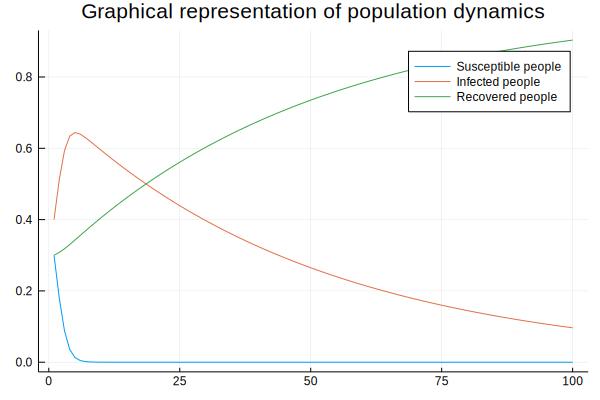

In [10]:

x = 1:T
y = [[el[1] for el in sim],[el[2] for el in sim],[el[3] for el in sim]]
p = plot(x, y, 
     title = "Graphical representation of population dynamics", ## adding a title
     label = ["Susceptible people" "Infected people" "Recovered people"]) ## adding legend labels

### A Spatial SIR model

We now consider another version of the model where agents evolve in the space $\mathcal{S}=[0,1]\times[0,1]$. There are $N\in\mathbb{N}$ agent. At any date, each agent $n \in [0,1]$  is located at $(x_n,y_n)\in \mathcal{S}$.

Each agent moves follows a random walk bounded by $\mathcal{S}$:
$$x_t = \min(\max( x_{t-1} + \epsilon_t, 0), 1)$$
$$y_t = \min(\max( y_{t-1} + \eta_t, 0), 1)$$
where $\epsilon_t$ and $\eta_t$ are both normally distributed with standard deviation $\sigma$.

At any date, the individual state of an agent is $s_t=(x_t, y_t, h_t)$ where $h_t$ is either "S", "I" or "R". $v_t$ denotes the states of all agents (for instance $v_t=(s_{n,t})_n$. The health status of each agent is updated in the following way:

- Agents $R$ stay $R$.
- Agents $I$ have probability $\pi$ to become $R$. They stay $I$ otherwise.
- An agent of type $S$ in position $(x,y)$ has a probability $prob(x,y,S)$ to be infected that is $\mu$ if there is another infected agent within a radius $r>0$.


__Define a type `Agent`, which holds the type of an agent. The state of the whole system will be held in a `Vector[Agent]` type.__



In [11]:
#Pkg.add("Revise")

In [12]:
struct Agent
    x::Float64
    y::Float64
    z::String
    
end

__Write a function `spatial_transition(S::Vector[Agent])::Vector[Agent]` to compute the transition of the positions. Write another function `random_guess(T=100)` which simulates for $T$ periods in order to find a good initial guess.__



In [13]:
Pkg.add("Distances")
Pkg.add("Distributions")
using Distances


  Resolving package versions...
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Project.toml`
 [no changes]
   Updating `~/.juliapro/JuliaPro_v1.4.0-1/environments/v1.4/Manifest.toml`
 [no changes]


In [52]:
σ=0.2
μ=0.5
r = 0.1
Π  = 0.05
using Distances
using Random, Distributions
function spatial_transition(S::Array{Agent,1})
    
    
    #Random.seed!(123)
    d = Normal(0.0, σ)
    
    e = rand(d, length(S))
    mu = rand(d, length(S))
    new_S = Agent[]
    
    for i in eachindex(S)
        
        x = S[i].x
        y = S[i].y
        h = S[i].z
        new_x = min(max(x + e[i],0),1)
        new_y = min(max(y + mu[i],0),1)
        
                
        push!(new_S,Agent(new_x,new_y,h))
        
    end
 
    return new_S 
end  


spatial_transition (generic function with 1 method)

In [53]:
function random_guess()

LoadError: syntax: incomplete: premature end of input

__Write a function `show_population` to plot all agents with different colors for different health status.__



In [54]:
using Plots 
function show_population(S)
    x = []
    y = []
    z = []
    for i in eachindex(S)
        push!(x,S[i].x)
        push!(y,S[i].y)
        push!(z,S[i].z)
        
    end
    scatter(
        x,
        y,
        group = z
       
    )
end 


show_population (generic function with 1 method)

In [55]:
T1 = Agent(0.1,0.3,"I")
T2 = Agent(0.2,0.2,"R")
T3 = Agent(0.3,0.80,"S")
T4 = Agent(0.0,0.73,"S")

Agent(0.0, 0.73, "S")

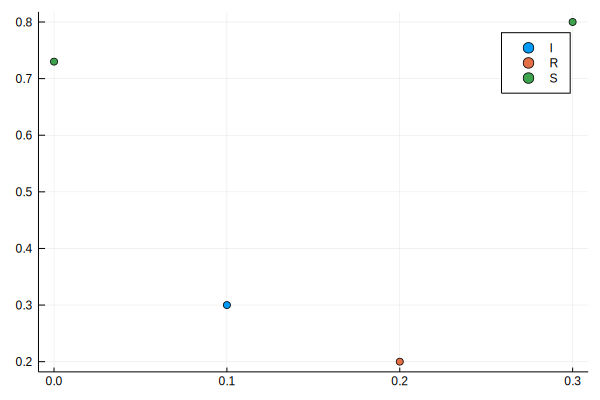

In [56]:
show_population([T1,T2,T3,T4])

__Write a function `evolve(S::Vector[Agent])::Vector[Agent]` which takes the population in a given state and returns the same population with updated health status.__



In [57]:
function evolve(S::Vector{Agent})
    new_S = Agent[]
    for i in eachindex(S)
        x = S[i].x
        y = S[i].y
        h = S[i].z
        
        if h =="R"
            new_h = "R"
        elseif h =="I"
            p = rand()
            
            if p <= Π
                new_h = "R"
            else
                new_h = "I"
            end
    
        
        else
            new_h = "S"
            i = 1
            while i <= length(S)
                if euclidean([S[i].x,S[i].y],[x,y]) < r
                    
                    if S[i].z == "I"
                        p = rand()
                        if p <= μ
                            new_h = "I"
                            i = length(S)+1
                        else
                            i=i+1
                        end
                    else
                        i=i+1
                    end
                end 
                i=i+1 
            end
        end       
        push!(new_S,Agent(x,y,new_h))
    end
    return new_S
    
end

evolve (generic function with 1 method)

In [58]:

S = [T1,T2,T3,T4]

S2 = evolve(S)
S3 = evolve(S2)
S4 = evolve(S3)
S4

4-element Array{Agent,1}:
 Agent(0.1, 0.3, "I")
 Agent(0.2, 0.2, "R")
 Agent(0.3, 0.8, "S")
 Agent(0.0, 0.73, "S")

__Write a function `simulate(S0::Vector[Agent], k=1)` to simulate the economy starting from an initially random position with `k` infected individuals. The returned object should be of type `Vector[Vector[Agent]]`.__



In [59]:
periods = 50
nb_agent = 50
#states = ["S","R"]
states2 = ["S"]
function simulate(k)
    S0 = Agent[]
    
    for infected in 1:k
        
        z = "I"
        x = rand(Uniform(0.0,1.0))
        y = rand(Uniform(0.0,1.0))
        push!(S0,Agent(x,y,z))
    end
    
    for i in 1:nb_agent-k
        #state_i = rand(1:2)
        #z = states[state_i]
        z2 = "S"
        x = rand(Uniform(0.0,1.0))
        y = rand(Uniform(0.0,1.0))
        push!(S0,Agent(x,y,z2))
    end
    
    St_evolution = [S0]
    for t in 1:periods-1
        St = St_evolution[t]
        S_t_position_updated = spatial_transition(St)
        S_t_heatlh_updtated = evolve(S_t_position_updated)
        push!(St_evolution, S_t_heatlh_updtated)
    end
    return St_evolution
end
        
        
        

simulate (generic function with 1 method)

__Compute statistics along a simulated path for $n_I$, $n_S$, $n_R$. Plot and compare with the basic SIR model__

In [60]:
function statistics(St_evolution)
    stat = []
    
    for i in eachindex(St_evolution)
        
        state = St_evolution[i]
        nI = 0
        nS = 0
        nR = 0
       # println(state)
        for k in eachindex(state)
            #println("ok")
            if state[k].z =="I"
                nI+=1
            elseif state[k].z =="R"
                nR+=1
            else 
                nS+=1
            end
            
        end
        push!(stat,[nS,nI,nR])
    end
    
    return stat
end
        
            
    

statistics (generic function with 1 method)

In [61]:
st = simulate(2)
#println(st)
for t in eachindex(st)
    map = st[t]
    show_population(map)
end
numbers = statistics(st)


50-element Array{Any,1}:
 [48, 2, 0]
 [46, 4, 0]
 [45, 5, 0]
 [43, 6, 1]
 [42, 7, 1]
 [41, 7, 2]
 [40, 8, 2]
 [35, 12, 3]
 [31, 16, 3]
 [24, 23, 3]
 [19, 28, 3]
 [14, 30, 6]
 [13, 29, 8]
 ⋮
 [0, 9, 41]
 [0, 9, 41]
 [0, 9, 41]
 [0, 7, 43]
 [0, 6, 44]
 [0, 6, 44]
 [0, 6, 44]
 [0, 5, 45]
 [0, 5, 45]
 [0, 5, 45]
 [0, 5, 45]
 [0, 4, 46]

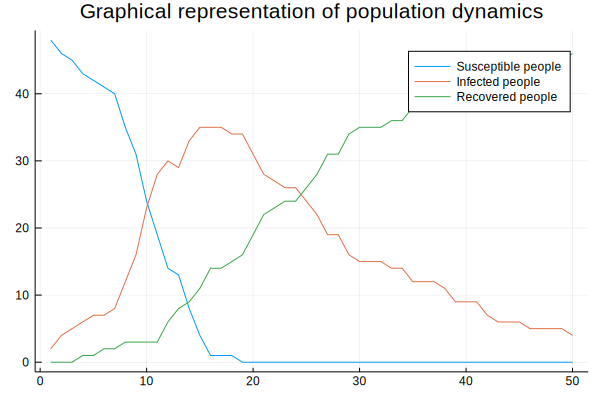

In [62]:
data_x = 1:periods
data_y = [[el[1] for el in numbers],[el[2] for el in numbers],[el[3] for el in numbers]]

p = plot(data_x, data_y, 
     title = "Graphical representation of population dynamics", ## adding a title
     label = [ "Susceptible people" "Infected people"  "Recovered people"]) ## adding legend labels

### Additional questions

Have fun by trying to answer one of these questions:
- change probability of infection so that it depends on the number of infected people in the vincinity (with some suitable functional formulation for)
- compute an animation of the transition
- compute an interactive visualisation (with `Interact.jl` if available)